Let's build by own pickle file

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Load projections
projs_angles = np.load("data/projs_angles_from_volume.npz")
projections = projs_angles["projs"].astype(np.float32)  # shape: (n_samples, 256, 256)
angles = projs_angles["angles"].astype(np.float32)      # shape: (n_samples,)

print(f"Projections, shape: {projections.shape}, type: {projections.dtype}")
print(f"Angles, shape: {angles.shape}, type: {angles.dtype}")

Projections, shape: (50, 256, 256), type: float32
Angles, shape: (50,), type: float32


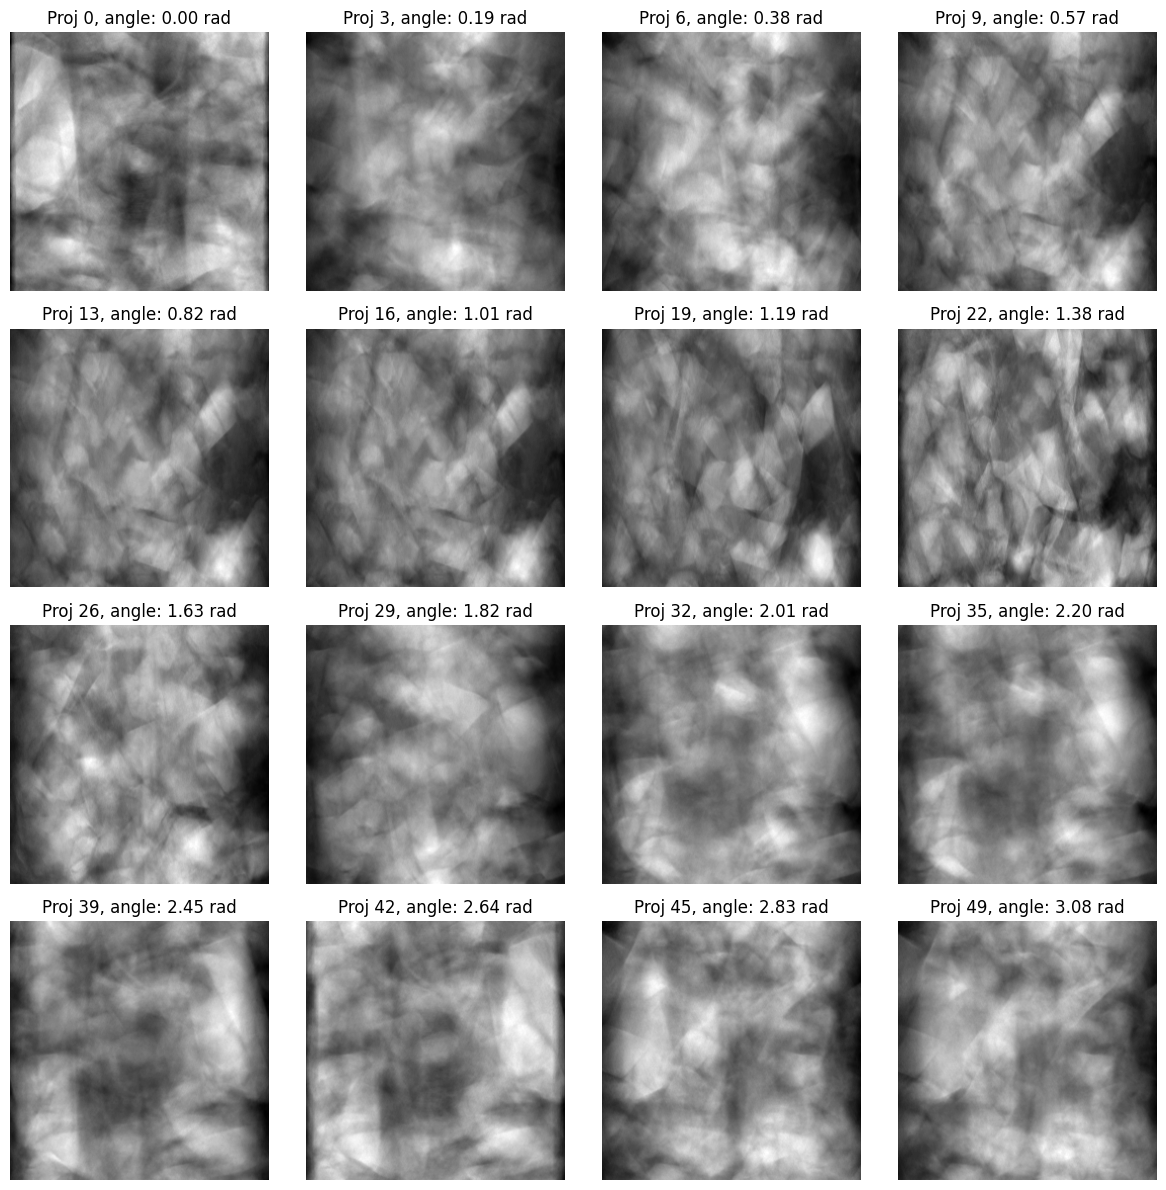

In [29]:
num_slices = 16 
slices_to_display = np.linspace(0, projections.shape[0] - 1, num_slices).astype(int)

rows = 4
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    slice_index = slices_to_display[i]
    ax.imshow(projections[slice_index, :, :], cmap='gray')
    ax.set_title(f'Proj {slice_index}, angle: {angles[slice_index]:.2f} rad')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [30]:
projections.min(), projections.max()

(0.0, 1.0)

In [31]:
# setup empty volume (debug)
volume = np.zeros((256, 256, 256))

In [32]:
import pickle

pickle_dict = {
    "numTrain": 50,                # my train projections
    "numVal": 50,                  # we test on the same train projections
    "DSD": 1500.0,
    "DSO": 1000.0,
    "nDetector": [256, 256],        # image size
    "dDetector": [1.0, 1.0],        # pixel size
    "nVoxel": [256, 256, 256],
    "dVoxel": [1.0, 1.0, 1.0],    
    "offOrigin": [0, 0, 0],
    "offDetector": [0, 0],
    "accuracy": 0.5,
    "mode": "parallel",
    "filter": None,
    "totalAngle": 180.0,
    "startAngle": 0.0,
    "randomAngle": False,
    "convert": True,
    "rescale_slope": 1.0,
    "rescale_intercept": 0.0,
    "normalize": True,
    "noise": 0,
    "image": volume,                # GT volume, if any
    "train": {
        "angles": angles,
        "projections": projections
    },
    "val": {
        "angles": angles,
        "projections": projections
    }
}

file_path = "data/projs_angles_from_volume.pickle"
with open(file_path, 'wb') as file:
    pickle.dump(pickle_dict, file)

print(f"{file_path} saved!")

data/projs_angles_from_volume.pickle saved!


In [33]:
angles

array([0.        , 0.06283186, 0.12566371, 0.18849556, 0.25132743,
       0.31415927, 0.37699112, 0.43982297, 0.50265485, 0.56548667,
       0.62831855, 0.69115037, 0.75398225, 0.81681406, 0.87964594,
       0.9424778 , 1.0053097 , 1.0681415 , 1.1309733 , 1.1938052 ,
       1.2566371 , 1.3194689 , 1.3823007 , 1.4451326 , 1.5079645 ,
       1.5707964 , 1.6336281 , 1.69646   , 1.7592919 , 1.8221238 ,
       1.8849556 , 1.9477874 , 2.0106194 , 2.073451  , 2.136283  ,
       2.1991148 , 2.2619467 , 2.3247786 , 2.3876104 , 2.4504423 ,
       2.5132742 , 2.576106  , 2.6389377 , 2.7017696 , 2.7646015 ,
       2.8274333 , 2.8902652 , 2.953097  , 3.015929  , 3.0787609 ],
      dtype=float32)